## Final Project: Pet Ownership Relative to Pet Type
### Lulu Li (Tiffany Li)

Project Report to run the exploratory data analysis, data cleaning, and deriving conclusions about the chosen dataset.

Dataset can be found at: https://data.kingcounty.gov/Licenses-Permits-and-Records/Lost-found-adoptable-pets/yaai-7frk/data 


The question to be addressed is if there is a correlation between types of pets that are lost, found, and adoptable. This could be based off of biases from families towards larger/smaller dogs, pet behavior, dogs vs. cats, and pet color. Within this question, pet qualities as well as pet outcome (sheltered, adopted, found) will be analyzed against pet physical characteristics and pet behavior. The value that would be applied will be given to animal foster homes/shelters in various urban areas so they can be proactive in understanding which pet types individuals and families tend to abandon, adopt, and do not care about retrieving. This will aid in animal overpopulation, shelter home overpopulation, and possible veterinary neutering/spaying processes.

The dataset being analyzed is a compilation of lost, found, and adoptable pets in King County, Washington. King County, Washington is the most populated county in Washington, which encompasses Seattle, the state’s largest city. With a low unemployment rate, large square mileage, highest-income per capita in Washington, and high population, this dataset was chosen to make inferences of other major counties in the country regarding pets that are lost, sheltered, and adoptable. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from sklearn.metrics import roc_curve, auc
from statsmodels.graphics.mosaicplot import mosaic

Load the dataset

In [3]:
pets_data = pd.read_csv("./Lost__found__adoptable_pets.csv", index_col = "impound_no")
pets_data.head()

,Animal_ID,Data_Source,Record_Type,Link,Current_Location,Animal_Name,animal_type,Age,Animal_Gender,Animal_Breed,...,City,State,Zip,jurisdiction,obfuscated_latitude,obfuscated_longitude,Image,image_alt_text,Memo,Temperament
impound_no,,,,,,,,,,,,,,,,,,,,,
K19-114622,A577662,Regional Animal Services of King County,FOUND,https://petharbor.com/PublicDetail.asp?searcht...,In Public Home,NaN,Dog,NaN,Male,Havanese,...,KIRKLAND,WA,98033.0,KIRKLAND,NaN,NaN,https://petharbor.com/get_image.asp?RES=Detail...,Image Copyright HLP Inc. 2019,NaN,NaN
K19-114625,A577665,Regional Animal Services of King County,LOST,https://petharbor.com/PublicDetail.asp?searcht...,LOST,Shorty,Dog,NaN,Male,Labrador Retriever,...,MAPLE VALLEY,WA,98038.0,MAPLE VALLEY,NaN,NaN,https://petharbor.com/get_image.asp?RES=Detail...,Image Copyright HLP Inc. 2019,NaN,NaN
K19-114702,A577893,Regional Animal Services of King County,LOST,https://petharbor.com/PublicDetail.asp?searcht...,LOST,Cole,Cat,NaN,Male,Domestic Shorthair,...,NaN,NaN,NaN,JURISDICTION,NaN,NaN,https://petharbor.com/get_image.asp?RES=Detail...,Image Copyright HLP Inc. 2019,NaN,NaN
K19-114704,A577895,Regional Animal Services of King County,LOST,https://petharbor.com/PublicDetail.asp?searcht...,LOST,Tater Tot,Dog,NaN,Female,Pembroke Welsh Corgi,...,RENTON,WA,98057.0,RENTON,NaN,NaN,https://petharbor.com/get_image.asp?RES=Detail...,Image Copyright HLP Inc. 2019,NaN,NaN
K19-114706,A577897,Regional Animal Services of King County,FOUND,https://petharbor.com/PublicDetail.asp?searcht...,In Public Home,NaN,Dog,NaN,Male,Rottweiler,...,NaN,NaN,NaN,JURISDICTION,NaN,NaN,https://petharbor.com/get_image.asp?RES=Detail...,Image Copyright HLP Inc. 2019,NaN,NaN


In [4]:
pets_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, K19-114622 to K19-114833
Data columns (total 24 columns):
Animal_ID               178 non-null object
Data_Source             178 non-null object
Record_Type             178 non-null object
Link                    178 non-null object
Current_Location        163 non-null object
Animal_Name             129 non-null object
animal_type             178 non-null object
Age                     96 non-null object
Animal_Gender           175 non-null object
Animal_Breed            178 non-null object
Animal_Color            178 non-null object
Date                    178 non-null object
Date_Type               178 non-null object
Obfuscated_Address      152 non-null object
City                    118 non-null object
State                   117 non-null object
Zip                     118 non-null float64
jurisdiction            155 non-null object
obfuscated_latitude     29 non-null float64
obfuscated_longitude    29 non-null float64
Imag

Text(0.5, 1.0, 'Percent Missing by Variable')

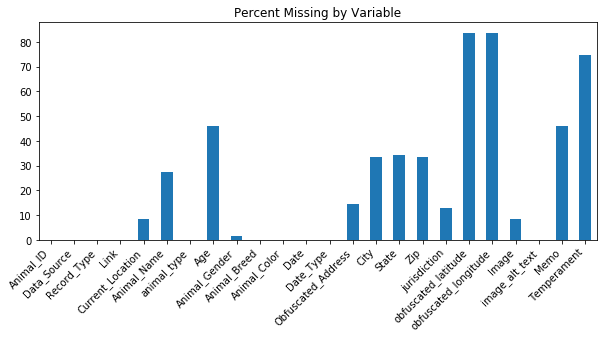

In [5]:
f, ax = plt.subplots(figsize=(10,4))
((pets_data.isnull().sum()/len(pets_data)) * 100).plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Percent Missing by Variable')

Since a lot of the geographic/location data is missing, and irrelevant to the analysis as we are only trying to determine pet characteristics and its relationship to pet status, we can take out that information. This includes "Current_Location, Animal_Name, Obfuscated_Address, City, State, Zip, Jurisdiction, Obfuscated_Latitude/Longitude, image, Memo". 

Geospatial data could be used if the original dataset that had addresses/locations. This could have been used to determine if more pets were being abandoned, adopted, lost in areas that were rural/urban, had larger/smaller property, or population density. Unfortunately this information, for privacy purposes I am assuming, has been removed. 

In [6]:
pets_data.drop(["Current_Location", "Animal_Name", "Obfuscated_Address", "City", "State", "Zip", "jurisdiction", 
                "obfuscated_latitude", "obfuscated_longitude", "Image", "Memo"], 
               axis = 1, inplace = True) 

In [7]:
pets_data.head()

,Animal_ID,Data_Source,Record_Type,Link,animal_type,Age,Animal_Gender,Animal_Breed,Animal_Color,Date,Date_Type,image_alt_text,Temperament
impound_no,,,,,,,,,,,,,
K19-114622,A577662,Regional Animal Services of King County,FOUND,https://petharbor.com/PublicDetail.asp?searcht...,Dog,NaN,Male,Havanese,Brown / Black,01/01/2019 12:00:00 AM,Date Found,Image Copyright HLP Inc. 2019,NaN
K19-114625,A577665,Regional Animal Services of King County,LOST,https://petharbor.com/PublicDetail.asp?searcht...,Dog,NaN,Male,Labrador Retriever,Yellow,01/01/2019 12:00:00 AM,Date Lost,Image Copyright HLP Inc. 2019,NaN
K19-114702,A577893,Regional Animal Services of King County,LOST,https://petharbor.com/PublicDetail.asp?searcht...,Cat,NaN,Male,Domestic Shorthair,Unknown,01/02/2019 12:00:00 AM,Date Lost,Image Copyright HLP Inc. 2019,NaN
K19-114704,A577895,Regional Animal Services of King County,LOST,https://petharbor.com/PublicDetail.asp?searcht...,Dog,NaN,Female,Pembroke Welsh Corgi,Unknown,01/04/2019 12:00:00 AM,Date Lost,Image Copyright HLP Inc. 2019,NaN
K19-114706,A577897,Regional Animal Services of King County,FOUND,https://petharbor.com/PublicDetail.asp?searcht...,Dog,NaN,Male,Rottweiler,Black / Brown,01/04/2019 12:00:00 AM,Date Found,Image Copyright HLP Inc. 2019,NaN


Here is the edited dataset with the dropped variables. This gives a preview to show what kind of variable responses each pet identifier has.

Text(0.5, 1.0, 'Percent Missing by Variable, New:')

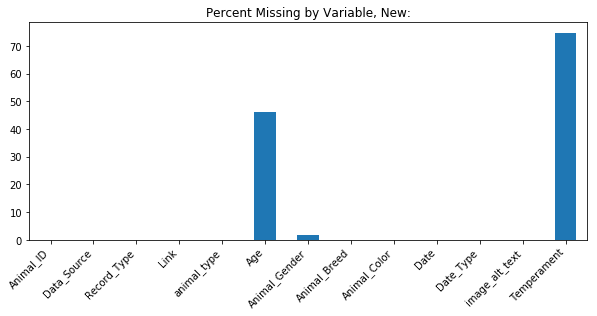

In [8]:
f, ax = plt.subplots(figsize=(10,4))
((pets_data.isnull().sum()/len(pets_data)) * 100).plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Percent Missing by Variable, New:')

In [9]:
pets_data = pd.concat([pets_data, pd.get_dummies(pets_data.Animal_ID, drop_first=True)], axis=1)

In [10]:
pets_data.head()

,Animal_ID,Data_Source,Record_Type,Link,animal_type,Age,Animal_Gender,Animal_Breed,Animal_Color,Date,...,A579703,A579704,A579705,A579706,A579707,A579708,A579709,A579710,A579711,A579712
impound_no,,,,,,,,,,,,,,,,,,,,,
K19-114622,A577662,Regional Animal Services of King County,FOUND,https://petharbor.com/PublicDetail.asp?searcht...,Dog,NaN,Male,Havanese,Brown / Black,01/01/2019 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
K19-114625,A577665,Regional Animal Services of King County,LOST,https://petharbor.com/PublicDetail.asp?searcht...,Dog,NaN,Male,Labrador Retriever,Yellow,01/01/2019 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
K19-114702,A577893,Regional Animal Services of King County,LOST,https://petharbor.com/PublicDetail.asp?searcht...,Cat,NaN,Male,Domestic Shorthair,Unknown,01/02/2019 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
K19-114704,A577895,Regional Animal Services of King County,LOST,https://petharbor.com/PublicDetail.asp?searcht...,Dog,NaN,Female,Pembroke Welsh Corgi,Unknown,01/04/2019 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
K19-114706,A577897,Regional Animal Services of King County,FOUND,https://petharbor.com/PublicDetail.asp?searcht...,Dog,NaN,Male,Rottweiler,Black / Brown,01/04/2019 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0


Variables include data source, pet type, pet status, animal type, animal color, record type (lost, found, adoptable), and temperament.

Text(0.5, 0, 'Animal Record')

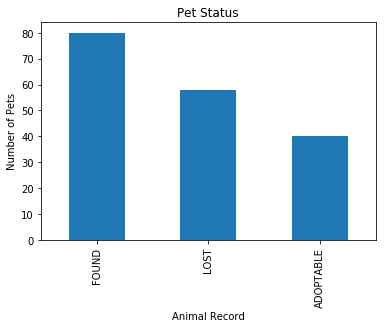

In [11]:
pets_data['Record_Type'].value_counts().plot(kind='bar')
plt.title('Pet Status')
plt.ylabel('Number of Pets')
plt.xlabel('Animal Record')

It is valuable to see the number of pets that are lost, found, and adoptable so we can compare that against pet type to see if there is a correlation between type of pet and pet status. This gives insight into certain biases certain owners may have towards animal type. We can see that of the pets that were reported to the animal shelter, more dogs were found than lost, and then more were lost than adoptable. To further analyze why this may be the case, we need to look at animal breeds.

Text(0.5, 0, 'Animal Record')

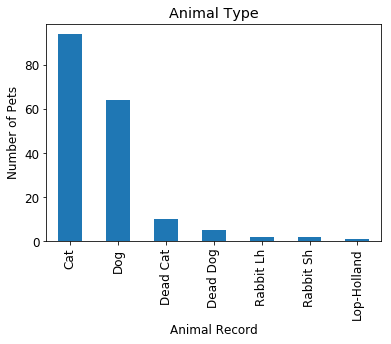

In [27]:
pets_data['animal_type'].value_counts().plot(kind='bar')
plt.title('Animal Type')
plt.ylabel('Number of Pets')
plt.xlabel('Animal Record')

For the purpose of this project, we will focus on (Live) Cat and Dogs. Now that we know that there are mainly cats and dogs, we can compare the number of cats and dogs that are found, lost, or adopted.

We see that there are more cats than dogs being reported, now it is time to see if there is any other data that may explain why this is.

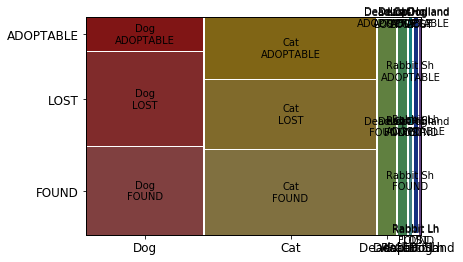

In [13]:
plt.rcParams['font.size'] = 12.0
mosaic(pets_data, ['animal_type', 'Record_Type']);

Here I plotted a mosaic to get a visual of the number of Cats vs. Dogs that are Lost, Found, Adoptable.

As we can see, there is a larger number of dogs reported lost than cats, though there are more cats in the dataset than dogs. Additionally, there are more cats that are considered adoptable than dogs. 

In a study by Weiss, et al. (2013), they found that dogs were more likely to be found than cats. This is supported by the analysis in this project dataset, where the dog portion is represented in red, and the cat portion is represented in yellow. 

There is a larger proportion of dogs found than cats, relatively. 

The supplemental literature review also found that dogs are more likely to be lost than cats (Weiss et al. 2013). This is further supported by the fact that there is a larger, relative proportion of dogs reported lost than cats.

Link to literature: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4494319/

Additionally, we can use the mosaic to look at if gender also plays a role.

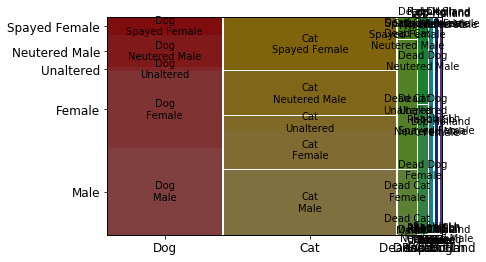

In [14]:
plt.rcParams['font.size'] = 12.0
mosaic(pets_data, ['animal_type', 'Animal_Gender']);

This new mosaic shows that there is a larger proportion of spayed/neutered cats and dogs reported in the shelters than there is unaltered.

This will need further research into characterizing why-- it is unknown if the shelter will perform their own spaying/neutering practice on found pets that are unaltered. This requires further analysis before a conclusion can be determined.

Further research shows that animal shelters (amongst other animal housing instutitions) are required by law to spay/neuter unclaimed, unaltered pets that enter their facility. Therefore, it is unknown if this large proportion of "corrected" pets is due to the fact that these observations in the dataset were recorded after the shelter has performed the procedures, or if the pets were reported to shelter in this condition.

Source: https://www.animallaw.info/intro/state-spay-and-neuter-laws 

Understanding how this data was collected relative to the animal fertility status is critical for further analysis. We are unable to make conclusions about any biases for pet owners to report (or not report) lost animals if they do not want to be in trouble for not fixing their pets, if their un-fixed pets were the reason for the animals being neglected, etc. 

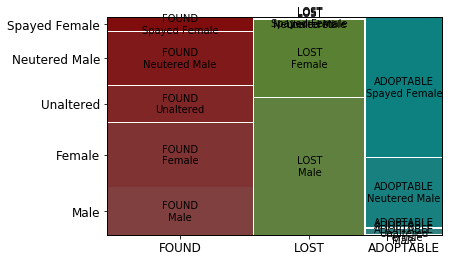

In [15]:
plt.rcParams['font.size'] = 12.0
mosaic(pets_data, ['Record_Type', 'Animal_Gender']);

This additional mosaic shows that more male pets were reported lost than female pets. Additionally, there were more found females than found males, and females were considered more adoptable than males. Furthermore, only fixed (spayed or neutered) animals were considered adoptable. 

This may be due to biases in pet owners. A literature review of pet behavior and pet-ownership led to an article by Stanley Coren, PhD, DSc, FRSC. Dr. Coren states that in dog aggression towards humans, most individuals have a bias against male dogs. This is due to the fact that aggressive behavior in dogs is due to testosterone levels, mainly due to ritualized behaviors resulting in certain "alpha masculine displays" to establish a social hierarchy. Though Dr. Coren states that females are more territorial and independent than male dogs, they are not as explicitly threatening. 

Additionally, Dr. Coren states that most humans, when posed with the problem of dog aggression, are more concerned about dog bites specifically. Male dogs pose a larger bite risk due to their increased size over female dogs. In a study conducted by U.S. National Center for Injury Prevention and Control, male dogs were 6.2x more likely to bite a human than female dogs. Additionally, unaltered dogs are 2.6x more likely to be in attacks than neutered dogs.

Source: https://www.psychologytoday.com/us/blog/canine-corner/201306/are-male-dogs-more-aggressive-females

Since we know that more male pets, especially dogs, are being reported in the shelters, then we can make inferences about dog breed.

Text(0.5, 0, 'Animal Breed')

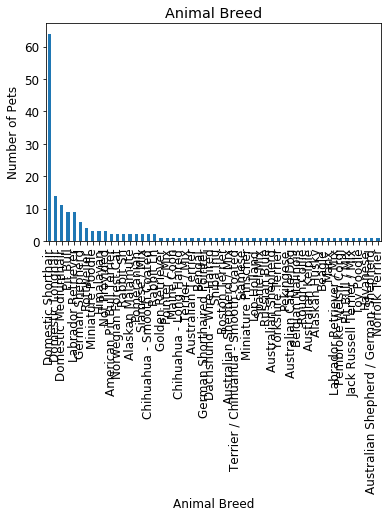

In [28]:
num_breeds = pets_data['Animal_Breed'].value_counts()
num_breeds.plot(kind='bar')
plt.title('Animal Breed')
plt.ylabel('Number of Pets')
plt.xlabel('Animal Breed')

From here we can see that of all the data, only about one-third of the breeds have more number of pets reported at the animal shelter than others. We can try to shift out this data.

In [34]:
num_breeds = pets_data['Animal_Breed'].value_counts()
print(num_breeds)

Domestic Shorthair                       64
Domestic Longhair                        14
Domestic Mediumhair                      11
Pit Bull                                  9
Labrador Retriever                        9
German Shepherd                           6
Rottweiler                                4
Miniature Poodle                          3
Himalayan                                 3
Not Provided                              3
American Pit Bull Terrier                 2
Norwegian Forest Cat                      2
Rabbit Sh                                 2
Alaskan Malamute                          2
Pomeranian                                2
Siamese / Mix                             2
Chihuahua - Smooth Coated                 2
Rabbit Lh                                 2
Golden Retriever                          1
Pointer / Mix                             1
Maine Coon                                1
Chihuahua - Long Haired                   1
Terrier / Mix                   

In order to interpret what this data means in significance, we need to look at the mean number of pets reported.

In [39]:
breed_mean = np.mean(num_breeds)


print("The average number of found dogs per animal breed is: ", breed_mean)


The average number of found dogs per animal breed is:  3.2962962962962963


As a result, we can see that Domestic Shorthairs, Domestic Longhairs, Domestic Mediumhairs, Pit Bulls, Labrador Retrievers, German Shepherds, and Rottweilers had above average number of pets reported.

From the dataset, we know that Domestic Shorthairs, Longhairs, and Mediumhairs are cats.
We also know that Pit Bulls, Labrador Retrievers, German Shepherds, and Rottweilers are dogs.

In order to understand why these certain dog breeds are being reported, I conducted supplemental research to understand any trends as to why these four dog breeds have a higher reported rate of appearing at the animal shelters. 

The article states the following: "In its study of records of serious dog bite injuries worldwide from 1971 to 2011, the AVMA found that German shepherds, pit bull mixes, Rottweilers, Jack Russell terriers, chow chows, spaniels, collies, Saint Bernards and Labrador retrievers were the most represented breeds in dog bite reports. According to the American Kennel Club, Labrador retrievers, German shepherds, Rottweilers, and spaniels are among the most popular breeds in the United States."
Source: https://www.mcall.com/news/breaking/mc-are-some-dog-breeds-more-aggressive-than-others-a-look-at-dog-attacks-20170428-story.html

One may infer that the prevalence of dog bite injuries related to those four breeds is not coincidentally the same four dog breeds that have a higher reported rate away from their owners. This may be due to owner biases or incidences in the owner home. This result may have some insight into the mindset regarding types of pets that owners view as "desirable." Additional research is needed before this assumption can be made.